<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 6: Data Processing & Cleaning for Data Science: Data Wrangling Documents and Web Scraping

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Wrangling Documents and Web Scraping. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 6.

## Parsing and Processing Text Documents

### Challenge 1: 
Given the text shown in the code below, you are asked to do the basic parsing and processing text operations checklist seen in the lecture (Slides 4-9) to provide a basic text analysis report.

``` python
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
```

`Hint:`
These are some of the basic text analysis operations

* Reading & Extracting Texts
*  Basic Text Cleaning:
    * Removing unnecessary punctuation, tags
    * Tokenization
    * Removing stop words
* Basic words Analysis

In [1]:
#Your Solution here
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
translator = str.maketrans('', '', string.punctuation + string.digits)
text = text.translate(translator)
print(text[:100])


Data science incorporates tools from multiple disciplines to gather a data set process and derive i


In [2]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(text.lower())
print(tokens[:20])


['data', 'science', 'incorporates', 'tools', 'from', 'multiple', 'disciplines', 'to', 'gather', 'a', 'data', 'set', 'process', 'and', 'derive', 'insights', 'from', 'the', 'data', 'set']


[nltk_data] Downloading package punkt to /home/tarik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
tokens = [w for w in tokens if w not in en_stopwords]
print(tokens)

['data', 'science', 'incorporates', 'tools', 'multiple', 'disciplines', 'gather', 'data', 'set', 'process', 'derive', 'insights', 'data', 'set', 'extract', 'meaningful', 'data', 'set', 'interpret', 'decisionmaking', 'purposes', 'disciplinary', 'areas', 'make', 'data', 'science', 'field', 'include', 'mining', 'statistics', 'machine', 'learning', 'analytics', 'programming', 'data', 'mining', 'applies', 'algorithms', 'complex', 'data', 'set', 'reveal', 'patterns', 'used', 'extract', 'useful', 'relevant', 'data', 'set', 'statistical', 'measures', 'predictive', 'analytics', 'use', 'extracted', 'data', 'gauge', 'events', 'likely', 'happen', 'future', 'based', 'data', 'shows', 'happened', 'past', 'machine', 'learning', 'artificial', 'intelligence', 'tool', 'processes', 'mass', 'quantities', 'data', 'human', 'would', 'unable', 'process', 'lifetime', 'machine', 'learning', 'perfects', 'decision', 'model', 'presented', 'predictive', 'analytics', 'matching', 'likelihood', 'event', 'happening', 'a

[nltk_data] Downloading package stopwords to /home/tarik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
cnt_fdist = nltk.FreqDist(tokens)
cnt_fdist.most_common(20)

[('data', 19),
 ('set', 5),
 ('machine', 4),
 ('learning', 4),
 ('analytics', 4),
 ('science', 3),
 ('process', 2),
 ('extract', 2),
 ('decisionmaking', 2),
 ('field', 2),
 ('mining', 2),
 ('algorithms', 2),
 ('predictive', 2),
 ('happened', 2),
 ('processes', 2),
 ('using', 2),
 ('analyst', 2),
 ('incorporates', 1),
 ('tools', 1),
 ('multiple', 1)]

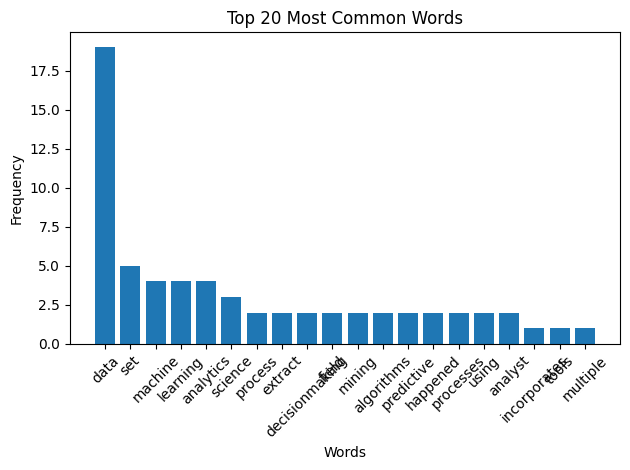

In [5]:
import matplotlib.pyplot as plt

common_words = [word[0] for word in cnt_fdist.most_common(20)]
word_freq = [freq[1] for freq in cnt_fdist.most_common(20)]

plt.bar(common_words, word_freq)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

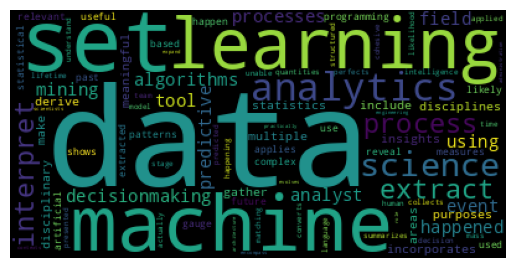

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Challenge 2:
You've just started a new data science position at the Cybersecurity Unit of the U.S. DEPARTMENT OF COMMERCE. The department wants to build, test, and evaluate new machine learning model using thier 2020 annual report document availabe in the local data folder:`2020_Cybersecurity_and_Privacy_Annual_Re.docx`. 

You are asked to provide a visual report summarizing the most common frequency keywords used in their report. 



In [7]:
#Your Solution here
from glob import glob
word_files = glob('data/*.docx')

In [8]:
from docx import Document

doc = Document(word_files[0])

text = "\n".join([paragraph.text for paragraph in doc.paragraphs])

text[:120]

'2020\nCybersecurity and Privacy Annual Report\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNIST SPECIAL PUBLIC'

In [9]:
import string

translator = str.maketrans('\n', ' ', string.punctuation + string.digits + '“' + '”' + '-' + '–' + '’')
text = text.translate(translator)

text = text.lower()
index = text.find('foreword')
text = text[index + len('foreword'):].strip()
text[:200]

'with each day bringing new cybersecurity and privacy challenges and advances it is little wonder that many leaders feel as if they have been cast in the role of the red queen in lewis carrolls through'

In [10]:
import nltk

tokens = nltk.word_tokenize(text)
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
tokens = [w for w in tokens if w not in en_stopwords]
tokens[:20]

['day',
 'bringing',
 'new',
 'cybersecurity',
 'privacy',
 'challenges',
 'advances',
 'little',
 'wonder',
 'many',
 'leaders',
 'feel',
 'cast',
 'role',
 'red',
 'queen',
 'lewis',
 'carrolls',
 'lookingglass',
 'classic']

In [11]:
cnt_fdist = nltk.FreqDist(tokens)
cnt_fdist.most_common(20)

[('nist', 183),
 ('cybersecurity', 134),
 ('privacy', 96),
 ('security', 96),
 ('standards', 65),
 ('development', 63),
 ('risk', 59),
 ('information', 54),
 ('systems', 53),
 ('management', 53),
 ('organizations', 48),
 ('research', 47),
 ('software', 44),
 ('public', 43),
 ('sp', 43),
 ('fy', 42),
 ('use', 42),
 ('program', 41),
 ('framework', 40),
 ('technology', 39)]

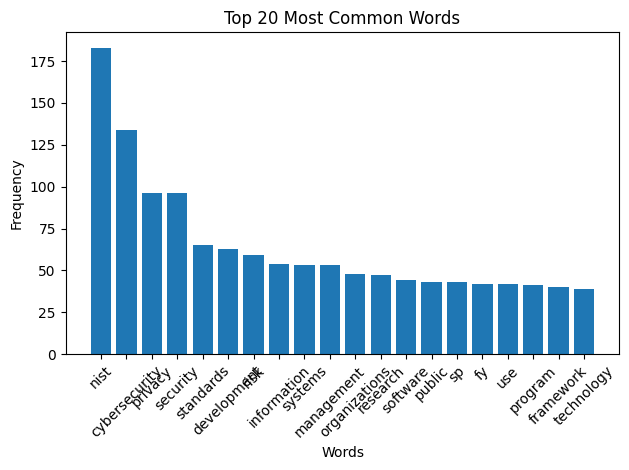

In [12]:
import matplotlib.pyplot as plt

common_words = [word[0] for word in cnt_fdist.most_common(20)]
word_freq = [freq[1] for freq in cnt_fdist.most_common(20)]

plt.bar(common_words, word_freq)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

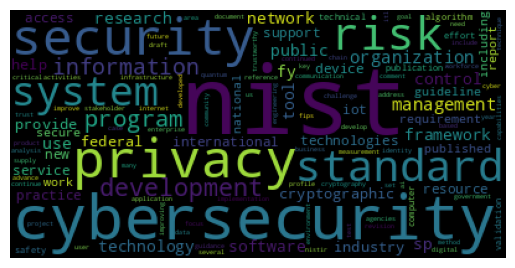

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Web Scraping: Parsing and processing Web Pages
### Challenge 3:
We want to analyse text collected from https://en.wikipedia.org/wiki/Data_science  wikipedia page. We are only interested on the text content of links html anchor (`a`).  

1. Do the cheklist basic text analyses to provid a visyal summarry of all href text links available on the page.

`Hint:`
1. Follow and adjust the procedures in Lecture 6 - Slides: 14-16 - to collect the required text. In case, you have not figured out how to collect the required information, here is below a code that help you:


``` python
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text
``` 

2. Follow the checklist text analysis to clean and visualize the most common words used in the collected text.

### Challenge 4:
We want to analyse text related to data science topic collected from different web pages: https://www.heavy.ai/learn/data-science,  https://en.wikipedia.org/wiki/Data_science, https://www.ibm.com/cloud/learn/data-science-introduction, and https://deepai.org/machine-learning-glossary-and-terms/data-science alongside with the text string object of challenge 01.

Note that we are only interested on the text content of  html anchor (`p`) from the webpages.  

1. Do the required procedures to collect all  `p` text available on all of the aformentioned web pages.
2. Append the collected text with the text string object of challenge 01
3. Do the cheklist basic text analyses to provid a visyal summarry of the most frequently used keywords on the resulted text.



In [14]:
#Your Solution
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs


url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

In [15]:
links = soup.find_all('p')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text[:200]

'\n Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extr'

In [16]:
# Removing unneccessary punctuation and tags
translator = str.maketrans('\n',' ',string.punctuation + string.digits + '`' + '[' + ']' + '“' + '”' + '-' + '–' + '’')
text = text.translate(translator)


# Tokenization

tokens = nltk.word_tokenize(text.lower())

# Removing stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]

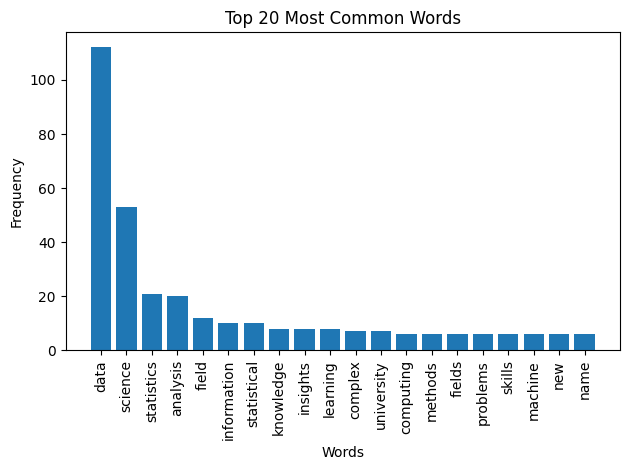

In [17]:

# Basic words Analysis
cnt_fdist = nltk.FreqDist(words)
common_words = [word[0] for word in cnt_fdist.most_common(20)]
word_freq = [freq[1] for freq in cnt_fdist.most_common(20)]

plt.bar(common_words, word_freq)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

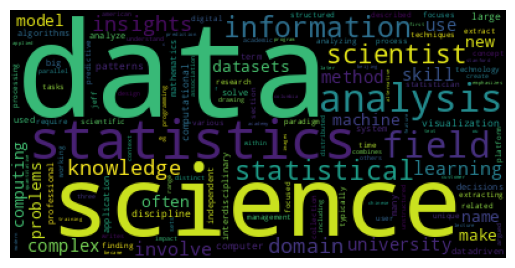

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Challenge 4:

You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes text, authors or Book titles, tags, and number of likes  from the `Motivational` tag on Goodreads as shown in the figure. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords by author, or book title, or keyword tags.



<img src="figures/goodbooks.png"  width='500px'/>


#### II.  Requirements:

##### 1. Web Scraping and data collection:

1. Scraping the the required contents from the two following first 5 pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1
  *  https://www.goodreads.com/quotes/tag/motivational?page=2
  *  https://www.goodreads.com/quotes/tag/motivational?page=3
  *  https://www.goodreads.com/quotes/tag/motivational?page=4
  *  https://www.goodreads.com/quotes/tag/motivational?page=5
  
2. Store the scraped data in a dataframe with the approporiat columns names 
##### 2. Text Analysis:

1. Performing basic text analysis and generate a visulaization report on:
  - The overall quot texts of the entire dataframe to identify the most common frequency keywords.
  - The quot texts by author or book title, or tag
2. Using the apropriate chart type, Visualize the number of likes  by author or booktitle or by tag.




### Hints:
1- Consider using the Browser Dev. Tools for further assistance and html componenets inspections to identify the appropriat related contents html css classes and tags.For example, each quote detail text is displayed in an html markup `div` with class name: `quoteText`.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```






In [19]:
#Your Solution
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd

base_url = "https://www.goodreads.com/quotes/tag/motivational?page="

# Base URL

# List to store the scraped data
data = []

# Scrape first 5 pages
for page in range(1, 6):
    url = base_url + str(page)
    page = urlopen(url).read().decode('utf-8')
    soup = bs(page)

    # Find all quote blocks
    quotes = soup.find_all("div", {"class": "quote"})
    
    for quote in quotes:
        try:

            quote_text = quote.find("div", {"class": "quoteText"}).get_text(strip=True).split("―")[0].strip()
            
            author_or_book = quote.find("span", {"class": "authorOrTitle"}).get_text(strip=True)
            

            tag_elements = quote.find("div", {"class": "greyText smallText left"}).find_all("a")
            tags = [tag.get_text(strip=True) for tag in tag_elements]

            likes_text = quote.find("a", {"class": "smallText"}).get_text(strip=True).split()[0]
            likes = int(likes_text.replace(',', '')) if likes_text.isdigit() else 0
            
            data.append({
                "Quote": quote_text,
                "Author/Book": author_or_book,
                "Tags": ", ".join(tags),
                "Likes": likes
            })

        except Exception as e:
            continue


df = pd.DataFrame(data)

df.to_csv("motivational_quotes.csv", index=False)
df.head()

,Quote,Author/Book,Tags,Likes
0,“I must not fear. Fear is the mind-killer. Fea...,"Frank Herbert,","bene-gesserit, fear, litany-against-fear, moti...",15999
1,“Attitude is a choice. Happiness is a choice. ...,"Roy T. Bennett,","attitude, choice, giving, happiness, inspirati...",9818
2,“Don't be pushed around by the fears in your m...,"Roy T. Bennett,","dreams, fearless, heart, inspiration, inspirat...",9515
3,“Believe in yourself. You are braver than you ...,"Roy T. Bennett,","achievement, believe-in-yourself, brave, coura...",6850
4,“Live the Life of Your Dreams: Be brave enough...,"Roy T. Bennett,","brave, courage, dreams, inspiration, inspirati...",6630


# Basic Text Analysis

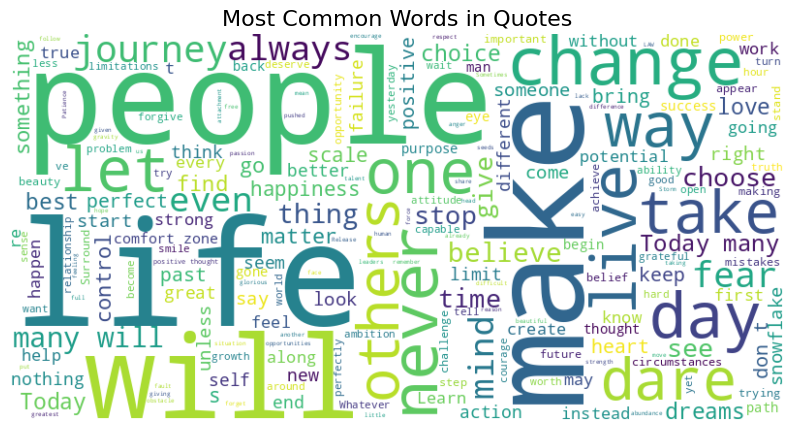

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

# Load DataFrame
df = pd.read_csv("motivational_quotes.csv")

# 1. Keyword Frequency Analysis for Quote Texts
all_words = " ".join(df["Quote"])
words = all_words.split()
common_words = Counter(words).most_common(20)

# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Quotes", fontsize=16)
plt.show()


/tmp/ipykernel_31327/2743258959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_by_author.values, y=likes_by_author.index, palette="viridis")


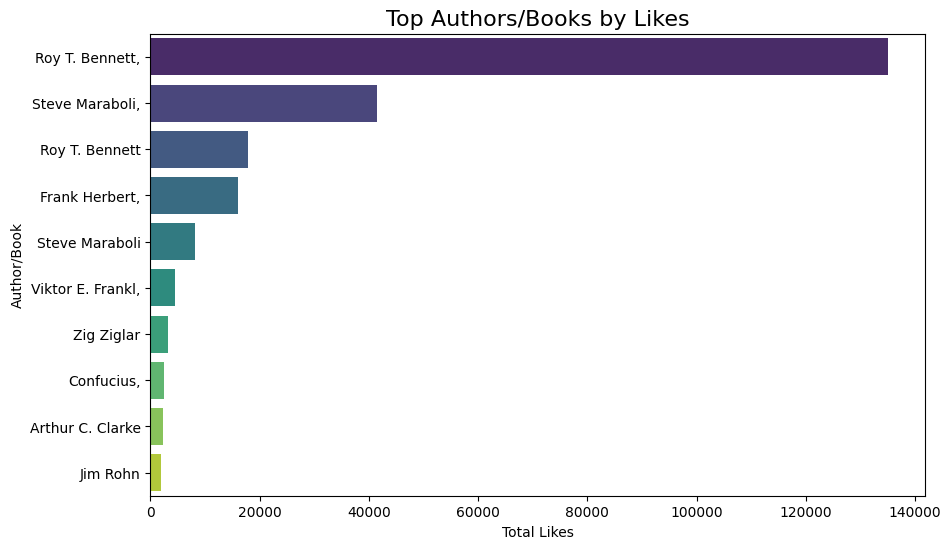

/tmp/ipykernel_31327/2743258959.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette="coolwarm")


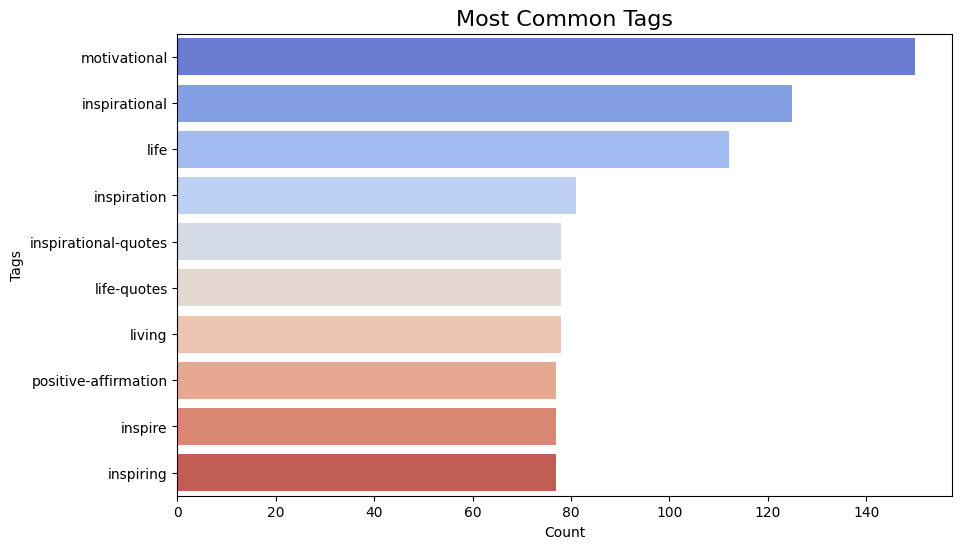

In [21]:

# 2. Likes by Author or Book Title
likes_by_author = df.groupby("Author/Book")["Likes"].sum().sort_values(ascending=False).head(10)

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_by_author.values, y=likes_by_author.index, palette="viridis")
plt.title("Top Authors/Books by Likes", fontsize=16)
plt.xlabel("Total Likes")
plt.ylabel("Author/Book")
plt.show()

# 3. Likes by Tags
df["Tags"] = df["Tags"].str.split(", ")
tags_flat = [tag for tags in df["Tags"].dropna() for tag in tags]
tags_likes = Counter(tags_flat)

# Visualization: Top Tags
top_tags = Counter(tags_flat).most_common(10)
tags, counts = zip(*top_tags)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=tags, palette="coolwarm")
plt.title("Most Common Tags", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Tags")
plt.show()
